# Project 3 Spruce Budworm Model
Project members:

* William Kendrick: 72587512
* Alessandro Adami: 32441974
* Sean Donaghy: 93591923



## Introduction
In this Project, we will analyse a model for spruce budworm infestations of Balsam Fir trees. This model's basic strucutre is that a "resource" population, which in this context are the Balsam Fir trees, is slowly impacted when a parasite population, which in this context are the spruce budworms, is present.

## Background Information
As the Balsam Fir trees lose biomass due to the budworms, the carrying capacity of the budworms decreases. It's also important to note that in this model, we account for the presence of certain types of predation, which causes the budworm population to crash suddenly once its carrying capacity hits some threshold level. This crash due to predation allows for the Balsam Fir trees population to slowly recover to above the budworm's crash-threshold which allows them to reproduce again. As a result, these dynamics repeat themselves.

## Model itself

We will define $B'$ = natural growth/death - predation (birds)

and $S'$ = natural growth/death - budworm activity.

### Budworm growth
$B' = rB(1-\frac{B}{k})$

we can replace this equation by rescaling r to 1:
however since the carrying capacity is based on the branch area we need to add a coefficient to convert it to the right units which we will denote as $\alpha$

$B' = B(1-\frac{B}{\alpha S})$

We also need to account for predation and as such the model becomes:

$B' = B(1-\frac{B}{\alpha S}) - \beta B$

Where $\beta B$ is the predation rate on budworms by birds. However there isn't enough budworms for birds to eat so the rate dies off therefore we need to divide by a constatnt term that effects the predation rate, $S$ to get:

$B' = B(1-\frac{B}{\alpha S}) - \beta \frac{B}{S + B}$

Birds tend to only target prey that is in abundance and as such only until a certian point where the population of budworm becomes in abundance do the birds target the budworms. As such we need to add a power to each term in the predation rate to account for this to get:

$B' = B(1-\frac{B}{\alpha S}) - \beta \frac{B^n}{S^n + B^n}$



### Tree Branch growth
Now we will look at the rate for tree branch growth:

$S' = \epsilon(S(1-s)- \delta B)$ Where the carrying capacity is dependent on $B$ therefore we write it as $\delta B$



## Overall Model

$B' = B(1-\frac{B}{\alpha S}) - \beta \frac{B^n}{S^n + B^n}$

$S' = \epsilon(S(1-S)- \delta B)$

Where:

* B: budworm population density
* S: total surface area of tree branches
* $\alpha$: sensitivity of budworm carrying capacity to branch loss
* $\beta$: intensity of predation by birds
* $\epsilon$: ratio of growth time scales (tree:budworm)
* $\delta$: per capita impact of budworm on trees
* $n$: power of predation

B (αS − B) (Sn + Bn) − αβSBn = 0

In order to get rid of any variables in the denominator we can rewrite our model for B to be:

$B(\alpha S - B)(S^n+B^n)-\alpha \beta S B^n = 0$


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import scipy.integrate as spi

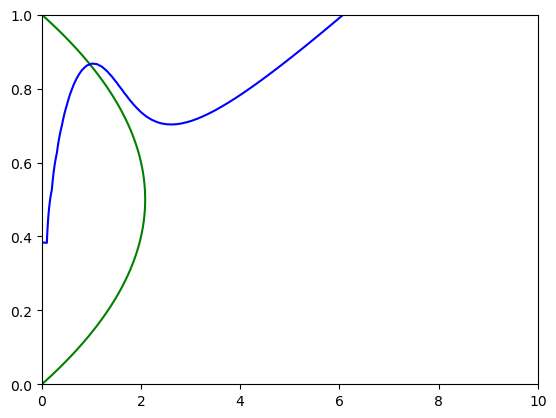

In [246]:
alpha = 8
beta = 1.5
epsilon = 0.05
#delta = 0.1
n = 2

fb_solve = lambda b,s: b*(alpha*s - b)*(s**n + b**n) - alpha*beta*s*b**n 
fb = lambda b,s: b*(1-(b/(alpha*s))) - beta*(b**n/(s**n+b**n))
fs = lambda b,s: epsilon*(s*(1-s) - delta*b)
b = np.linspace(0,10,100)
s = np.linspace(0,1,100)
B,S = np.meshgrid(b,s)
Zb = fb_solve(B,S)
Zs = fs(B,S)

plt.contour(B,S,Zs, levels = 0, colors = 'g')
plt.contour(B,S,Zb,levels=0,colors='b')
plt.show()

In [247]:
F = lambda v: np.array([fb_solve(*v),fs(*v)])
v0 = [2,0.6]
v = spo.fsolve(F,v0)
v

array([0.96526081, 0.86629046])

### Finding approx solutions to system of ODE's

We have our two equations: 

$B' = B(1-\frac{B}{\alpha S}) - \beta \frac{B^n}{S^n + B^n}$

$S' = \epsilon(S(1-S)- \delta B)$

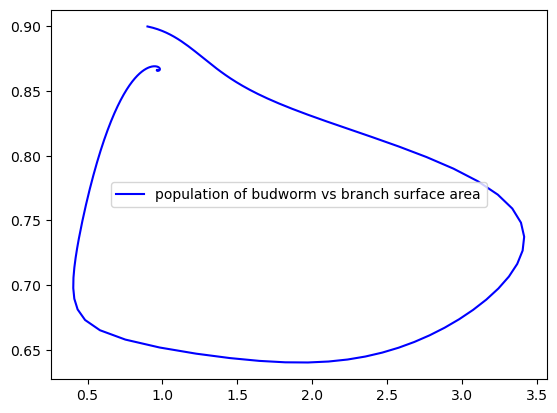

In [248]:
u0 = [0.9,0.9]
N = 10000
t = np.linspace(0,10000,N)
f = lambda v,t: np.array([fb(*v),fs(*v)])
u = spi.odeint(f,u0,t)
plt.plot(u[:,0], u[:,1],  color = 'b', label = "population of budworm vs branch surface area")
plt.legend()
plt.show()

### Testing Small Shifts in Parmeters

#### Changing $\beta$ between $[1.2,1.8]$

In [175]:
beta = 1.2

If we set our parameter $\beta = 1.2$, we see that our model eventually predicts the system will reach a steady state with a budworm population of around $0.6$, and a branch surface area of around $2.5$. At first, the worm popilation is growing exponentially, but then the tree-branch resource is exhausted and the model falls back into the steady state. We can justify the predation of birds not overcoming the growth of the worm population by considering the fact that bird predation only has a significant impact when the worm population is large. Therefore the worms and branches grow together up until the point where the birds take notice, after which the worm population collapses until it reaches a steady state.

In [172]:
beta = 1.8

If instead we set $\beta = 1.8$, the predation rate controls the worm population growth to such an extent that the worms have somewhat linear growth. However, eventually we reach a steady state. This is once again due to the fact that bird predation grows with budworm population size. In this case, the carryting capacity plays no relevant role in the model, since the predation parameter is so high.

In [230]:
delta = 0.08

Let's now analyze $\delta = 0.08$. Our initial system had periodic behaviour. Our new system is similar in that it has periodic (spiral) behaviour, however it is slowly converging to a steady state point. Since $\delta$ represents the per capita impact of budworm on trees, it make sense that lowering it will cause the branches to be less and less impaced as the birds are predating the worms.

In [245]:
delta = 0.12

Let's now analyze $\delta = 0.12$. As mentioned above, $\delta$ is the per capita impact of budworm on trees. Hence highering in we should expect the branches to grow less and less as the worms are growing. This prediction is reflected in the model, as we lose our original periodic behaviour and we instead quickly reach a steady state (i.e. the carrying capacity of the system) as the worms exhaust their branch resources.